COSAS POR HACER

1 REORDENAR LAS TABLAS DE AÑO 2012

2 CAMBIARLE LOS NOMBRES A LA SEGUNDA TABLA

3 SEPARAR LOS ELEMENTOS EN PERIODO A SEMANA Y PERIODO

4 ELIMINAR ELEMENTOS DAÑADOS Y NULOS

POSDATA: AVISARLE AL SERNAPESCA QUE NO ENTIENDO QUE ACS ES EL MODIF DESCANSO 2 :)


In [1]:
#Sector Pinox
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk


archivo = pd.read_excel('Cargas_parasitarias_2012_2024.xlsx')
# 'archivo' already contains the excel data, access sheets directly
df = pd.read_excel('Cargas_parasitarias_2012_2024.xlsx', sheet_name="2014-2024")  # Changed to read the original file
df2 = pd.read_excel('Cargas_parasitarias_2012_2024.xlsx', sheet_name="2012-2013") # Changed to read the original file
archivo.info()
print(df.head())
archivo.describe()
print(df2.head())
archivo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137143 entries, 0 to 137142
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Código Centro            137143 non-null  object 
 1   semana                   137143 non-null  int64  
 2   Año                      137143 non-null  int64  
 3   Región                   137143 non-null  object 
 4   ACS                      137143 non-null  object 
 5   Especie                  137143 non-null  object 
 6   Prom. Hembras Ovígeras   137143 non-null  float64
 7   Prom. Adultos Móviles    137143 non-null  float64
 8   Prom. Juveniles          137143 non-null  float64
 9   Prom. Parásitos Totales  137143 non-null  float64
 10  Temperatura              137143 non-null  object 
 11  Salinidad                137143 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 12.6+ MB
  Código Centro  semana   Año    Región       ACS       

,Código Centro,semana,Año,Región,ACS,Especie,Prom. Hembras Ovígeras,Prom. Adultos Móviles,Prom. Juveniles,Prom. Parásitos Totales,Temperatura,Salinidad
0,100068,1,2014,X REGION,ACS 10 A,Salmon Del Atlantico,0.750,1.400,2.900,5.050000,13.1,32
1,100104,1,2014,X REGION,ACS 10 A,Trucha Arcoiris,4.650,4.275,3.275,12.200001,11.8,35
2,100176,1,2014,X REGION,ACS 17 A,Trucha Arcoiris,2.600,2.900,2.600,8.100000,15.6,20
3,100182,1,2014,X REGION,ACS 3 B,Salmon Del Atlantico,1.200,1.250,0.925,3.375000,12,32
4,100189,1,2014,X REGION,ACS 3 B,Trucha Arcoiris,4.575,3.375,2.575,10.525000,12.8,32


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137143 entries, 0 to 137142
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Código Centro            137143 non-null  object 
 1   semana                   137143 non-null  int64  
 2   Año                      137143 non-null  int64  
 3   Región                   137143 non-null  object 
 4   ACS                      137143 non-null  object 
 5   Especie                  137143 non-null  object 
 6   Prom. Hembras Ovígeras   137143 non-null  float64
 7   Prom. Adultos Móviles    137143 non-null  float64
 8   Prom. Juveniles          137143 non-null  float64
 9   Prom. Parásitos Totales  137143 non-null  float64
 10  Temperatura              137143 non-null  object 
 11  Salinidad                137143 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 12.6+ MB


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46178 entries, 0 to 46177
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Período                     46175 non-null  object 
 1   Cóigo Centro                46175 non-null  float64
 2   Región                      46175 non-null  object 
 3   ACS                         46175 non-null  object 
 4   Especie                     46175 non-null  object 
 5   Temperatura Promedio        46175 non-null  float64
 6   Salinidad Promedio          46175 non-null  float64
 7   Promedio Juv,               46175 non-null  float64
 8   Promedio HO                 46175 non-null  float64
 9   Promedio AM                 46175 non-null  float64
 10  Parásitos totales promedio  19378 non-null  float64
 11  Promedio HO+AM              46175 non-null  float64
dtypes: float64(8), object(4)
memory usage: 4.2+ MB


In [4]:
# Filtrar filas donde 'ACS' contiene "ACS" y no hay valores " - " en ninguna columna
df_cleaned = df[df['ACS'].str.contains('ACS', na=False)]
df_cleaned = df_cleaned[~df_cleaned.isin(['-']).any(axis=1)]
df_cleaned['Temperatura'] = pd.to_numeric(df_cleaned['Temperatura'], errors='coerce')
df_cleaned['Salinidad'] = pd.to_numeric(df_cleaned['Salinidad'], errors='coerce')

# Verificar el resultado
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 134736 entries, 0 to 137142
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Código Centro            134736 non-null  object 
 1   semana                   134736 non-null  int64  
 2   Año                      134736 non-null  int64  
 3   Región                   134736 non-null  object 
 4   ACS                      134736 non-null  object 
 5   Especie                  134736 non-null  object 
 6   Prom. Hembras Ovígeras   134736 non-null  float64
 7   Prom. Adultos Móviles    134736 non-null  float64
 8   Prom. Juveniles          134736 non-null  float64
 9   Prom. Parásitos Totales  134736 non-null  float64
 10  Temperatura              134736 non-null  float64
 11  Salinidad                134736 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 13.4+ MB


In [5]:
df_cleaned.to_excel('Archivo1 Limpio.xlsx', index = False)

In [6]:
df2.head()

,Período,Cóigo Centro,Región,ACS,Especie,Temperatura Promedio,Salinidad Promedio,"Promedio Juv,",Promedio HO,Promedio AM,Parásitos totales promedio,Promedio HO+AM
0,Semana 1 (2-ENE-2012 al 8-ENE-2012),110228.0,XI REGION,ACS 25 B,SALMON PLATEADO O COHO,12.55,20.0,0.00,0.00,0.00,0.00,0.0
1,Semana 1 (2-ENE-2012 al 8-ENE-2012),110261.0,XI REGION,ACS 25 B,SALMON DEL ATLANTICO,12.00,22.0,0.00,0.00,0.00,0.00,0.0
2,Semana 1 (2-ENE-2012 al 8-ENE-2012),110714.0,XI REGION,ACS 26 A,SALMON DEL ATLANTICO,12.00,29.0,1.50,1.12,0.88,3.50,2.0
3,Semana 1 (2-ENE-2012 al 8-ENE-2012),104085.0,X REGION,ACS 8,SALMON DEL ATLANTICO,15.70,32.0,0.08,0.00,0.00,0.08,0.0
4,Semana 1 (2-ENE-2012 al 8-ENE-2012),110260.0,XI REGION,ACS 25 A,SALMON PLATEADO O COHO,11.70,19.0,0.00,0.00,0.00,0.00,0.0


In [7]:
# Esto calculará la suma fila por fila para cada registro en las columnas especificadas
# Completar la columna 'Parásitos totales promedio' en df2
df2['Parásitos totales promedio'] = df2['Promedio Juv,'] + df2['Promedio HO'] + df2['Promedio AM']

# Verificar el resultado
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46178 entries, 0 to 46177
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Período                     46175 non-null  object 
 1   Cóigo Centro                46175 non-null  float64
 2   Región                      46175 non-null  object 
 3   ACS                         46175 non-null  object 
 4   Especie                     46175 non-null  object 
 5   Temperatura Promedio        46175 non-null  float64
 6   Salinidad Promedio          46175 non-null  float64
 7   Promedio Juv,               46175 non-null  float64
 8   Promedio HO                 46175 non-null  float64
 9   Promedio AM                 46175 non-null  float64
 10  Parásitos totales promedio  46175 non-null  float64
 11  Promedio HO+AM              46175 non-null  float64
dtypes: float64(8), object(4)
memory usage: 4.2+ MB


In [8]:
df_cleaned2 = df2[df2['ACS'].str.contains('ACS', na=False)]
df_cleaned2 = df_cleaned2[~df_cleaned2.isin(['-']).any(axis=1)]
df_cleaned2.rename(columns={'Cóigo Centro': 'Código Centro'}, inplace=True)
# Extraer el número de la semana y el año de la columna 'Período'
df_cleaned2['semana'] = df_cleaned2['Período'].str.extract(r'Semana (\d+)').astype(int)
df_cleaned2['Año'] = df_cleaned2['Período'].str.extract(r'(\d{4})').astype(int)

# Guardar los cambios en un nuevo dataset
df_cleaned22 = df_cleaned2.copy()
# Verificar el resultado
df_cleaned22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45522 entries, 0 to 46177
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Período                     45522 non-null  object 
 1   Código Centro               45522 non-null  float64
 2   Región                      45522 non-null  object 
 3   ACS                         45522 non-null  object 
 4   Especie                     45522 non-null  object 
 5   Temperatura Promedio        45522 non-null  float64
 6   Salinidad Promedio          45522 non-null  float64
 7   Promedio Juv,               45522 non-null  float64
 8   Promedio HO                 45522 non-null  float64
 9   Promedio AM                 45522 non-null  float64
 10  Parásitos totales promedio  45522 non-null  float64
 11  Promedio HO+AM              45522 non-null  float64
 12  semana                      45522 non-null  int64  
 13  Año                         45522 no

In [9]:
df_cleaned2.to_excel('Archivo2 Limpio.xlsx', index = False)

In [10]:
df_cleaned2.describe()

,Código Centro,Temperatura Promedio,Salinidad Promedio,"Promedio Juv,",Promedio HO,Promedio AM,Parásitos totales promedio,Promedio HO+AM,semana,Año
count,45522.000000,45522.000000,45522.000000,45522.000000,45522.000000,45522.000000,45522.000000,45522.000000,45522.000000,45522.000000
mean,106907.985545,10.960200,28.984107,2.723362,1.828990,1.860366,6.412718,3.689294,26.932296,2012.317407
std,4571.186536,1.825497,5.085604,6.767838,4.175017,3.914468,13.348841,7.947034,14.791020,0.465472
min,100054.000000,1.150000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2012.000000
25%,102158.000000,9.800000,28.000000,0.220000,0.100000,0.150000,0.690000,0.300000,14.000000,2012.000000
50%,110193.000000,10.700000,31.000000,1.020000,0.980000,1.050000,3.530000,2.100000,27.000000,2012.000000
75%,110586.000000,12.050000,32.000000,2.800000,2.400000,2.420000,7.860000,4.880000,40.000000,2013.000000
max,120128.000000,22.000000,92.000000,295.350000,172.850000,155.270000,466.740000,328.120000,52.000000,2013.000000


In [11]:
df_cleaned.describe()

,semana,Año,Prom. Hembras Ovígeras,Prom. Adultos Móviles,Prom. Juveniles,Prom. Parásitos Totales,Temperatura,Salinidad
count,134736.000000,134736.000000,134736.000000,134736.000000,134736.000000,134736.000000,134736.000000,134736.000000
mean,26.269067,2018.788943,1.418404,1.883250,2.395443,5.697097,11.004845,28.011943
std,15.075490,3.052937,3.290256,3.947884,5.958211,11.927211,1.935072,5.534747
min,1.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.700000
25%,13.000000,2016.000000,0.000000,0.000000,0.000000,0.050000,10.000000,26.000000
50%,26.000000,2019.000000,0.450000,0.575000,0.525000,1.900000,11.000000,30.000000
75%,39.000000,2021.000000,1.950000,2.350000,2.375000,6.925000,12.200000,32.000000
max,53.000000,2024.000000,177.899994,171.850006,323.233337,454.440002,22.500000,95.800003


In [12]:
# Contar elementos que contienen "ACS"
acs_count = df_cleaned22['ACS'].str.contains('ACS', na=False).sum()

# Contar elementos que no contienen "ACS"
non_acs_count = len(df_cleaned22) - acs_count

print(f"Elementos con 'ACS': {acs_count}")
print(f"Elementos con otra cosa: {non_acs_count}")

Elementos con 'ACS': 45522
Elementos con otra cosa: 0


In [13]:
# Valores únicos en las columnas Región, semana y Especie
regiones_unicas = df['Región'].unique()
semanas_unicas = df['semana'].unique()
especies_unicas = df['Especie'].unique()

print("Regiones únicas:", regiones_unicas)
print("Semanas únicas:", semanas_unicas)
print("Especies únicas:", especies_unicas)

# Comprobar si hay datos vacíos en la columna 'semana'


Regiones únicas: ['X REGION' 'XI REGION' 'XIV REGION' 'XII REGION' '-']
Semanas únicas: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53]
Especies únicas: ['Salmon Del Atlantico' 'Trucha Arcoiris' 'Salmon Plateado O Coho' '-']


In [14]:
import re

# Copia del DataFrame para no modificar el original
df_cleaned2 = df_cleaned2.copy()

# Asegurarse de que la columna 'Período' esté presente en df_cleaned2
if 'Período' not in df_cleaned2.columns and 'Período' in df2.columns:
    df_cleaned2['Período'] = df2['Período']

# Extraer semana y año desde el campo "Período"
def extraer_semana_anio(periodo):
    match = re.search(r"Semana (\d+).*\b(\d{4})\b", str(periodo))
    if match:
        semana = int(match.group(1))
        anio = int(match.group(2))
        return pd.Series([semana, anio])
    return pd.Series([None, None])

df_cleaned2[['semana', 'Año']] = df_cleaned2['Período'].apply(extraer_semana_anio)

# Renombrar columnas para que coincidan
df_cleaned2 = df_cleaned2.rename(columns={
    'Cóigo Centro': 'Código Centro',
    'Temperatura Promedio': 'Temperatura',
    'Salinidad Promedio': 'Salinidad',
    'Promedio HO': 'Prom. Hembras Ovígeras',
    'Promedio AM': 'Prom. Adultos Móviles',
    'Promedio Juv,': 'Prom. Juveniles',
    'Parásitos totales promedio': 'Prom. Parásitos Totales'
})

# Seleccionar solo columnas comunes con df_2014_2024
columnas_comunes = [
    'Código Centro', 'semana', 'Año', 'Región', 'ACS', 'Especie',
    'Prom. Hembras Ovígeras', 'Prom. Adultos Móviles', 'Prom. Juveniles',
    'Prom. Parásitos Totales', 'Temperatura', 'Salinidad'
]

df_cleaned2 = df_cleaned2[columnas_comunes]

# Unir los DataFrames
df_cleaned = df_cleaned.rename(columns={'semana': 'semana', 'Código Centro': 'Código Centro'})
df_unificado = pd.concat([df_cleaned2, df_cleaned[columnas_comunes]], ignore_index=True)

df_unificado.info()
df_unificado.to_excel('Archivo_Unificado_Limpio.xlsx', index = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180258 entries, 0 to 180257
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Código Centro            180258 non-null  object 
 1   semana                   180258 non-null  int64  
 2   Año                      180258 non-null  int64  
 3   Región                   180258 non-null  object 
 4   ACS                      180258 non-null  object 
 5   Especie                  180258 non-null  object 
 6   Prom. Hembras Ovígeras   180258 non-null  float64
 7   Prom. Adultos Móviles    180258 non-null  float64
 8   Prom. Juveniles          180258 non-null  float64
 9   Prom. Parásitos Totales  180258 non-null  float64
 10  Temperatura              180258 non-null  float64
 11  Salinidad                180258 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 16.5+ MB


In [15]:
df_unificado.describe()

,semana,Año,Prom. Hembras Ovígeras,Prom. Adultos Móviles,Prom. Juveniles,Prom. Parásitos Totales,Temperatura,Salinidad
count,180258.000000,180258.000000,180258.000000,180258.000000,180258.000000,180258.000000,180258.000000,180258.000000
mean,26.436558,2017.156193,1.522093,1.877471,2.478255,5.877818,10.993570,28.257451
std,15.006885,3.861660,3.539142,3.939474,6.174328,12.305633,1.908087,5.441236
min,1.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.700000
25%,13.000000,2013.000000,0.000000,0.000000,0.030000,0.125000,9.900000,26.600000
50%,26.000000,2017.000000,0.600000,0.700000,0.650000,2.350000,10.900000,30.000000
75%,39.000000,2020.000000,2.075000,2.375000,2.500000,7.215000,12.100000,32.000000
max,53.000000,2024.000000,177.899994,171.850006,323.233337,466.740000,22.500000,95.800003


In [16]:
# Contar la cantidad de veces que aparece cada elemento en la columna 'Especie'
conteo_especies = df_unificado['Especie'].value_counts()

# Mostrar el resultado
print(conteo_especies)

Especie
Salmon Del Atlantico      112426
SALMON DEL ATLANTICO       29472
Trucha Arcoiris            15128
TRUCHA ARCOIRIS            12537
Salmon Plateado O Coho      7182
SALMON PLATEADO O COHO      3362
SALMON REY O CHINOOK         151
Name: count, dtype: int64


In [17]:

# Crear un diccionario de reemplazo para unificar las especies
reemplazos = {
    'Salmon Del Atlantico': 'Salmon Atlantico',
    'SALMON DEL ATLANTICO': 'Salmon Atlantico',
    'Trucha Arcoiris': 'Trucha Arcoiris',
    'TRUCHA ARCOIRIS': 'Trucha Arcoiris',
    'Salmon Plateado O Coho': 'Salmon Plateado',
    'SALMON PLATEADO O COHO': 'Salmon Plateado',
    'SALMON REY O CHINOOK': 'Salmon Rey'
}

# Reemplazar los valores en la columna 'Especie' usando el diccionario
df_unificado['Especie'] = df_unificado['Especie'].replace(reemplazos)


Número de filas duplicadas: 16334
      Código Centro  semana   Año     Región       ACS           Especie  \
712        103372.0       3  2012   X REGION  ACS 12 A  Salmon Atlantico   
953        110702.0       4  2012  XI REGION  ACS 23 A  Salmon Atlantico   
1716       110205.0       7  2012  XI REGION  ACS 31 B   Trucha Arcoiris   
2398       110553.0      10  2012  XI REGION  ACS 23 C  Salmon Atlantico   
2600       110216.0      11  2012  XI REGION    ACS 34  Salmon Atlantico   
...             ...     ...   ...        ...       ...               ...   
45517      110143.0      52  2012  XI REGION    ACS 27   Salmon Plateado   
45518      102988.0      52  2012   X REGION    ACS 14        Salmon Rey   
45519      100679.0      52  2012   X REGION  ACS 10 B  Salmon Atlantico   
45520      102818.0      52  2012   X REGION   ACS 9 B   Trucha Arcoiris   
45521      110445.0      52  2012  XI REGION  ACS 22 A  Salmon Atlantico   

       Prom. Hembras Ovígeras  Prom. Adultos Móviles 

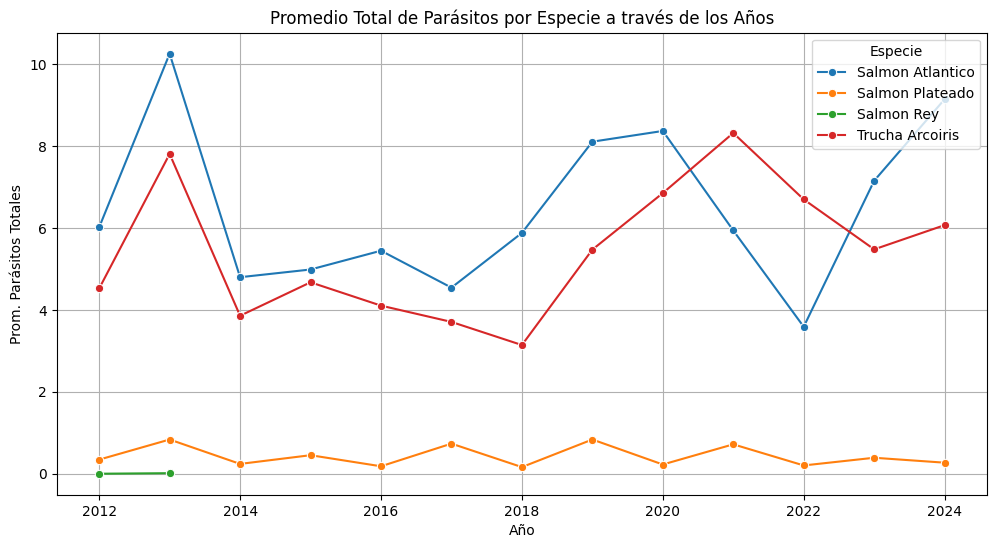

In [21]:
import seaborn as sns

# Agrupar los datos por especie y año, y calcular el promedio de parásitos totales
promedios_por_especie = df_unificado.groupby(['Año', 'Especie'])['Prom. Parásitos Totales'].mean().reset_index()

# Ordenar los datos por año
promedios_por_especie = promedios_por_especie.sort_values(by=['Año'])

# Crear la gráfica
plt.figure(figsize=(12, 6))
sns.lineplot(data=promedios_por_especie, x='Año', y='Prom. Parásitos Totales', hue='Especie', marker='o')

# Configurar etiquetas y título
plt.title('Promedio Total de Parásitos por Especie a través de los Años')
plt.xlabel('Año')
plt.ylabel('Prom. Parásitos Totales')
plt.legend(title='Especie')
plt.grid(True)
plt.savefig("grafico_personalizadopromedio.png", dpi=300, bbox_inches='tight', transparent=True)

# Mostrar la gráfica
plt.show()

In [22]:
#Calcular el promedio de parásitos totales y hembras ovígeras
promedio_parasitos_totales = df_unificado['Prom. Parásitos Totales'].mean()
promedio_hembras_ovigeras = df_unificado['Prom. Hembras Ovígeras'].mean()

#Filtrar solo las filas donde la especie es "salmon del atlantico"
salmones = df_unificado[df_unificado['Especie'] == 'Salmon Atlantico']
#Calcular el promedio de hembras ovígeras en los salmones
promedio_hembras_ovigeras_salmones = salmones['Prom. Hembras Ovígeras'].mean()

#Mostrar el resultado
print(f"Promedio de hembras ovígeras en los salmones: {promedio_hembras_ovigeras_salmones:.2f}")
#Calcular el promedio de parásitos totales en los salmones
promedio_parasitos_salmones = salmones['Prom. Parásitos Totales'].mean()

#Mostrar el resultado
print(f"Promedio de parásitos totales en los salmones: {promedio_parasitos_salmones:.2f}")
print(f"Promedio de parásitos totales: {promedio_parasitos_totales:.2f}")
print(f"Promedio de hembras ovígeras: {promedio_hembras_ovigeras:.2f}")

Promedio de hembras ovígeras en los salmones: 1.66
Promedio de parásitos totales en los salmones: 6.42
Promedio de parásitos totales: 5.88
Promedio de hembras ovígeras: 1.52


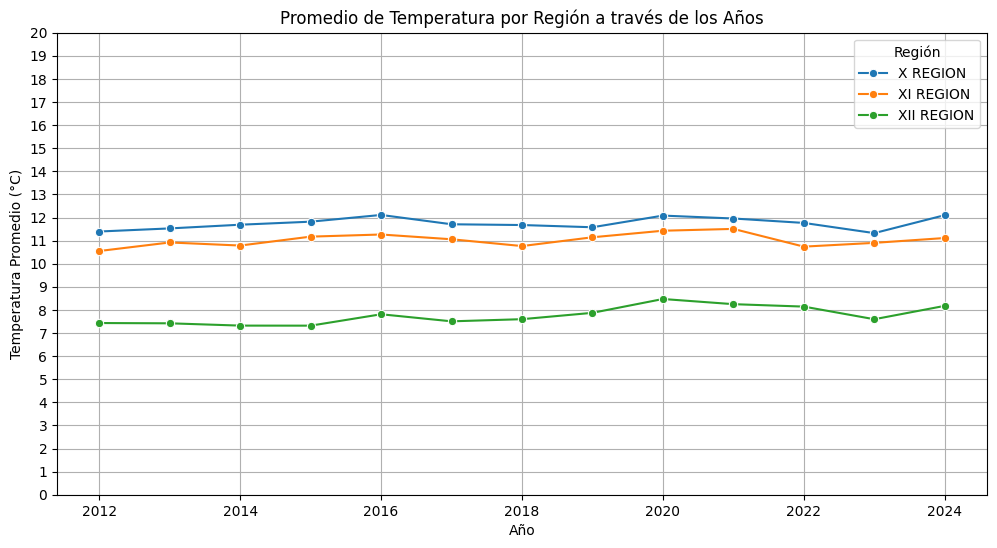

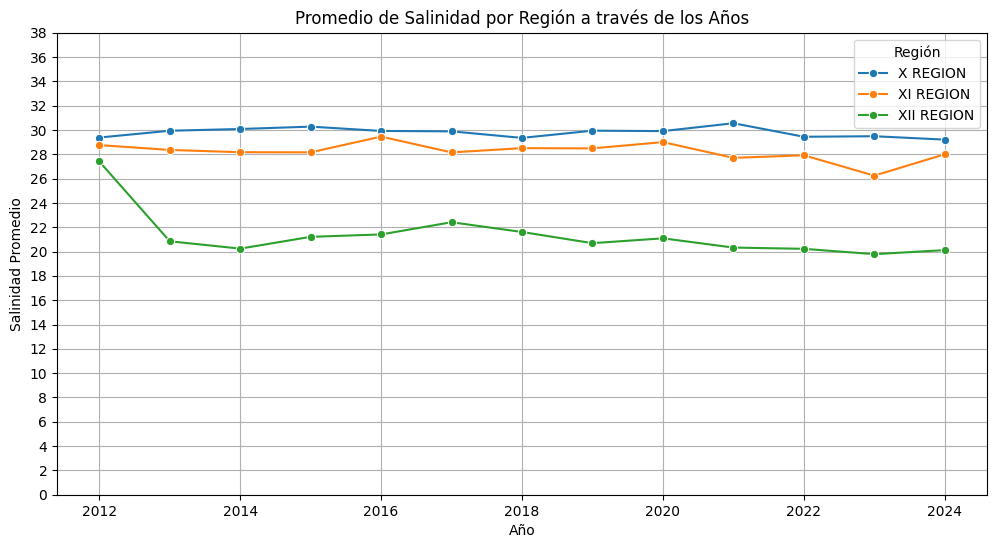

In [23]:
import seaborn as sns

# Agrupar los datos por región y año, calculando el promedio de temperatura y salinidad
promedios_por_region_anio = df_unificado.groupby(['Año', 'Región']).agg({
    'Temperatura': 'mean',
    'Salinidad': 'mean'
}).reset_index()

# Gráfico 1: Relación de la temperatura por región a través de los años
plt.figure(figsize=(12, 6))
sns.lineplot(data=promedios_por_region_anio, x='Año', y='Temperatura', hue='Región', marker='o')
plt.title('Promedio de Temperatura por Región a través de los Años')
plt.xlabel('Año')
plt.ylabel('Temperatura Promedio (°C)')
plt.legend(title='Región', loc='upper right')
plt.grid(True)
plt.ylim(0, 20)
plt.yticks(range(0, 21, 1))
plt.savefig("grafico_personalizadostemperatura.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

# Gráfico 2: Relación de la salinidad por región a través de los años
plt.figure(figsize=(12, 6))
sns.lineplot(data=promedios_por_region_anio, x='Año', y='Salinidad', hue='Región', marker='o')
plt.title('Promedio de Salinidad por Región a través de los Años')
plt.xlabel('Año')
plt.ylabel('Salinidad Promedio')
plt.legend(title='Región', loc='upper right')
plt.grid(True)
plt.ylim(0, 20)
plt.yticks(range(0, 40, 2))
plt.savefig("grafico_salinidad.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


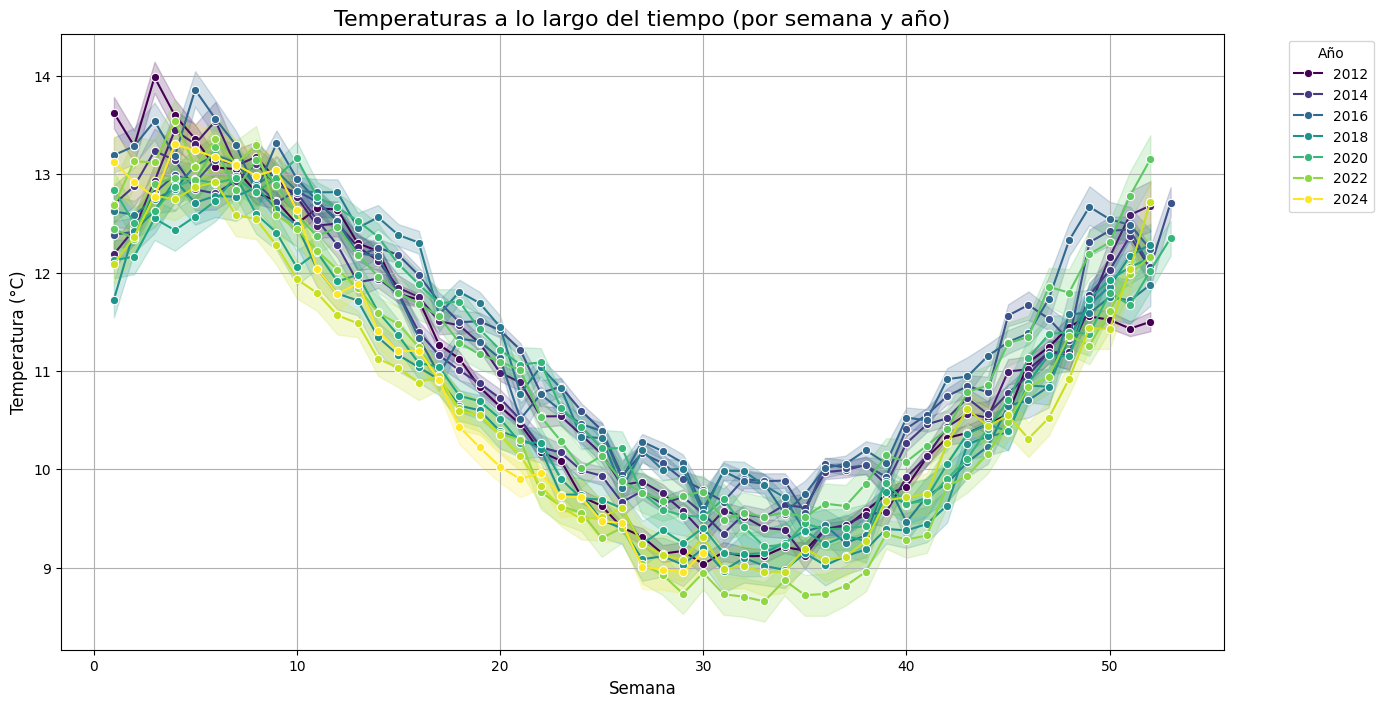

In [24]:
# Crear un gráfico de líneas para mostrar todas las temperaturas
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_unificado, x='semana', y='Temperatura', hue='Año', palette='viridis', marker='o')

# Configurar etiquetas y título
plt.title('Temperaturas a lo largo del tiempo (por semana y año)', fontsize=16)
plt.xlabel('Semana', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Mostrar el gráfico
plt.show()

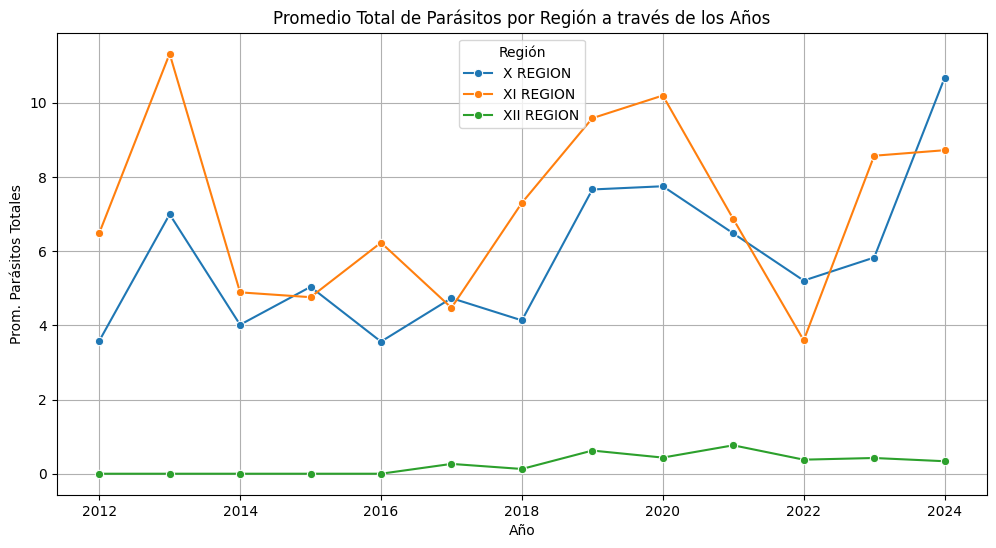

In [25]:
import seaborn as sns
promedios_por_region_anio = df_unificado.groupby(['Año', 'Región']).agg({
    'Temperatura': 'mean',
    'Prom. Parásitos Totales': 'mean'
}).reset_index()
# Crear la gráfica
plt.figure(figsize=(12, 6))
sns.lineplot(data=promedios_por_region_anio, x='Año', y='Prom. Parásitos Totales', hue='Región', marker='o')

# Configurar etiquetas y título
plt.title('Promedio Total de Parásitos por Región a través de los Años')
plt.xlabel('Año')
plt.ylabel('Prom. Parásitos Totales')
plt.legend(title='Región')
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [26]:
# Calcular estadísticas para Temperatura
min_temperatura = df_unificado['Temperatura'].min()
max_temperatura = df_unificado['Temperatura'].max()
promedio_temperatura = df_unificado['Temperatura'].mean()

# Calcular estadísticas para Salinidad
min_salinidad = df_unificado['Salinidad'].min()
max_salinidad = df_unificado['Salinidad'].max()
promedio_salinidad = df_unificado['Salinidad'].mean()

# Mostrar resultados
print(f"Temperatura - Mínimo: {min_temperatura}, Máximo: {max_temperatura}, Promedio: {promedio_temperatura:.2f}")
print(f"Salinidad - Mínimo: {min_salinidad}, Máximo: {max_salinidad}, Promedio: {promedio_salinidad:.2f}")

Temperatura - Mínimo: 0.8999999761581421, Máximo: 22.5, Promedio: 10.99
Salinidad - Mínimo: 0.6999999880790712, Máximo: 95.80000305175781, Promedio: 28.26


In [27]:
df_unificado.to_excel('Archivo_Unificado_Limpio.xlsx', index = False)

In [28]:
# Contar elementos que contienen "ACS"
acs_count = df_unificado['ACS'].str.contains('ACS', na=False).sum()

# Contar elementos que no contienen "ACS"
non_acs_count = len(df_unificado) - acs_count

print(f"Elementos con 'ACS': {acs_count}")
print(f"Elementos con otra cosa: {non_acs_count}")

Elementos con 'ACS': 180258
Elementos con otra cosa: 0


MSE: 1.6537648635088607e-13
R²: 0.999999999999999
Coeficientes:
  Prom. Hembras Ovígeras: 1.0000000077914502
  Prom. Adultos Móviles: 0.9999999915538946
  Prom. Juveniles: 0.9999999997468556
  Temperatura: -1.7486952243498384e-10
  Salinidad: 3.4824335794870443e-10
Intercepto: -3.9268117646429346e-09


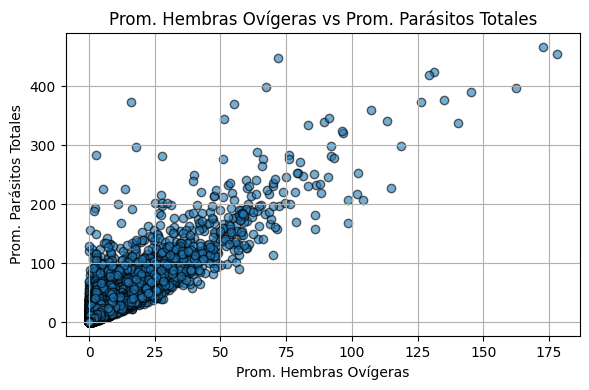

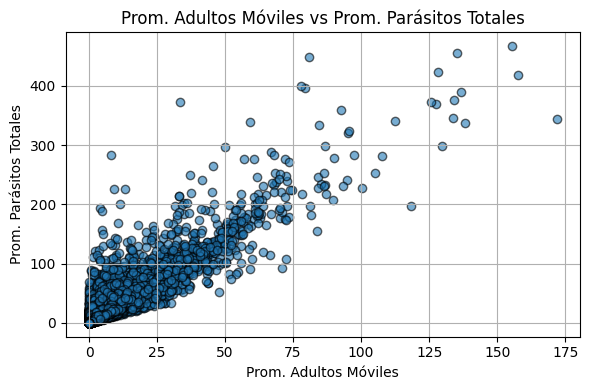

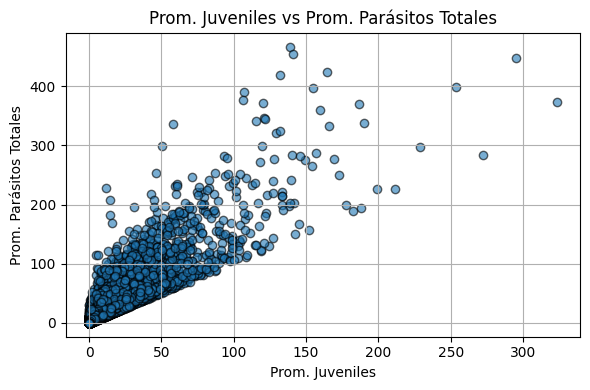

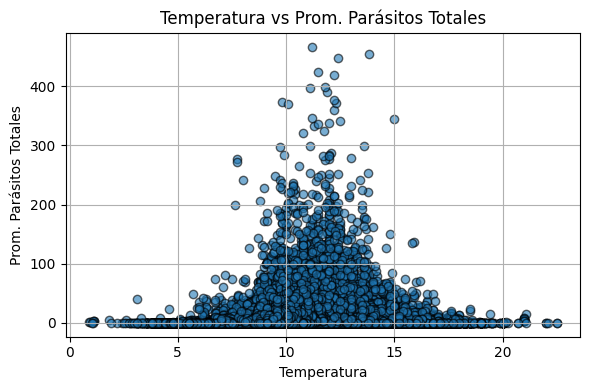

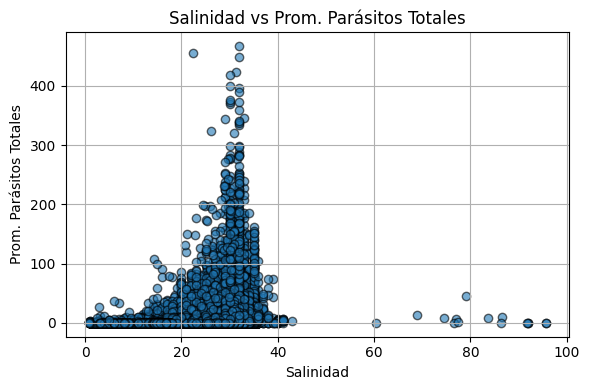

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Definir variables predictoras y objetivo
columnas_usar = [
    'Prom. Hembras Ovígeras',
    'Prom. Adultos Móviles',
    'Prom. Juveniles',
    'Temperatura',
    'Salinidad'
]
X = df_unificado[columnas_usar]
y = df_unificado['Prom. Parásitos Totales']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coeficientes = dict(zip(columnas_usar, modelo.coef_))
intercepto = modelo.intercept_

print("MSE:", mse)
print("R²:", r2)
print("Coeficientes:")
for var, coef in coeficientes.items():
    print(f"  {var}: {coef}")
print("Intercepto:", intercepto)

# Gráficos de dispersión
for col in columnas_usar:
    plt.figure(figsize=(6, 4))
    plt.scatter(df_unificado[col], df_unificado['Prom. Parásitos Totales'], alpha=0.6, edgecolors='k')
    plt.xlabel(col)
    plt.ylabel('Prom. Parásitos Totales')
    plt.title(f'{col} vs Prom. Parásitos Totales')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [68]:
# Codificar variables categóricas usando One-Hot Encoding
df_encoded = pd.get_dummies(df_unificado, columns=['Región', 'Especie', 'ACS'], drop_first=True)

# Definir variables predictoras (X) y objetivo (y)
X = df_encoded.drop(columns=['Prom. Parásitos Totales', 'Código Centro', 'Año', 'semana'])
y = df_encoded['Prom. Parásitos Totales']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Entrenar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print("MSE:", mse)
print("R²:", r2)
print("Coeficientes:")
for var, coef in zip(X.columns, modelo.coef_):
    print(f"  {var}: {coef}")
print("Intercepto:", modelo.intercept_)


MSE: 1.6551058077769795e-13
R²: 0.999999999999999
Coeficientes:
  Prom. Hembras Ovígeras: 1.0000000077739655
  Prom. Adultos Móviles: 0.9999999915120328
  Prom. Juveniles: 0.9999999997565632
  Temperatura: -2.1581217368726868e-10
  Salinidad: 3.639325958648687e-10
  Región_XI REGION: 4.683410336631111e-09
  Región_XII REGION: -5.383672986580823e-10
  Especie_Salmon Plateado: -4.8556056501947165e-09
  Especie_Salmon Rey: -1.304176984099183e-09
  Especie_Trucha Arcoiris: 1.881676729362236e-09
  ACS_ACS 10 A: 6.2144970471716965e-09
  ACS_ACS 10 B: -1.9514525992966186e-08
  ACS_ACS 11: 2.4858562293847797e-08
  ACS_ACS 11 mod: 4.790385174039541e-10
  ACS_ACS 12 A: -3.507010832345253e-09
  ACS_ACS 12 B: -6.6835197987168225e-09
  ACS_ACS 13: 1.817209347517064e-09
  ACS_ACS 14: -6.548781659180191e-09
  ACS_ACS 15: -7.40163624135667e-09
  ACS_ACS 16: -5.71420027874886e-09
  ACS_ACS 17 A: 3.5253871703399414e-09
  ACS_ACS 17 B: 8.827409865358113e-10
  ACS_ACS 18 A: 8.411887068957187e-09
  ACS_ACS

In [69]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Cargar datos
df = pd.read_excel("Archivo_Unificado_Limpio.xlsx")

# Eliminar nulos
df = df.dropna(subset=[
    'semana', 'Año', 'Temperatura', 'Salinidad',
    'Prom. Hembras Ovígeras', 'Prom. Adultos Móviles',
    'Prom. Juveniles', 'Prom. Parásitos Totales'
])

# Usa todo o reduce manualmente si quieres evitar errores de memoria
usar_muestra = False  # cambia a True si tienes errores de memoria

if usar_muestra:
    df = df.sample(n=10000, random_state=42)

# Variables predictoras y objetivo
X = df[['semana', 'Año', 'Temperatura', 'Salinidad',
        'Prom. Hembras Ovígeras', 'Prom. Adultos Móviles', 'Prom. Juveniles']]
y = df['Prom. Parásitos Totales']

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Random Forest
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Predicción y evaluación
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
importancias = pd.Series(modelo.feature_importances_, index=X.columns).sort_values(ascending=False)

# Resultados
print("MSE:", mse)
print("R²:", r2)
print("\nImportancia de variables:")
print(importancias)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

📥 Cargar datos,
df = pd.read_excel("Archivo_Unificado_Limpio.xlsx")

🧹 Eliminar nulos,
df = df.dropna(subset=[
    'semana', 'Año', 'Temperatura', 'Salinidad',
    'Prom. Hembras Ovígeras', 'Prom. Adultos Móviles',
    'Prom. Juveniles', 'Prom. Parásitos Totales'
])

✅ Usa todo o reduce manualmente si quieres evitar errores,
usar_muestra = False  # cambia a True si tienes errores de memoria

if usar_muestra:
    df = df.sample(n=10000, random_state=42)

🎯 Variables predictoras y objetivo,
X = df[['semana', 'Año', 'Temperatura', 'Salinidad',
        'Prom. Hembras Ovígeras', 'Prom. Adultos Móviles', 'Prom. Juveniles']]
y = df['Prom. Parásitos Totales']

✂️ División entrenamiento/prueba,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

🌲 Modelo Random Forest,
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

🔮 Predicción y evaluación,
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
importancias = pd.Series(modelo.featureimportances, index=X.columns).sort_values(ascending=False)

📤 Resultados,
print("MSE:", mse)
print("R²:", r2)
print("\nImportancia de variables:")
print(importancias)

SyntaxError: invalid character '📥' (U+1F4E5) (3081083536.py, line 49)

## Clasificación de "Prom. Hembras Ovígeras" en bajo, medio y alto usando Random Forest

En esta sección, categorizaremos la variable "Prom. Hembras Ovígeras" en tres clases (bajo, medio, alto) usando terciles, y entrenaremos un modelo Random Forest para predecir estas categorías. Finalmente, visualizaremos la matriz de confusión para evaluar el desempeño del modelo.

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Mejores hiperparámetros:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mejores hiperparámetros:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

        alto       0.88      0.91      0.90     11913
        bajo       0.94      0.92      0.93     12287
       medio       0.83      0.82      0.83     11852

    accuracy                           0.89     36052
   macro avg       0.88      0.88      0.88     36052
weighted avg       0.89      0.89      0.89     36052

              precision    recall  f1-score   support

        alto       0.88      0.91      0.90     11913
        bajo       0.94      0.92      0.93     12287
       medio       0.83      0.82      0.83     11852

    accuracy                           0.89     36052
   macro avg       0

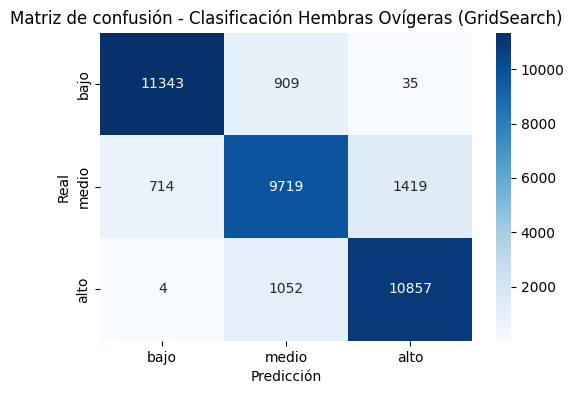

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
# (Si ya tienes df, omite esta línea)
df = pd.read_excel("Archivo_Unificado_Limpio.xlsx")

# Eliminar nulos relevantes
variables_relevantes = [
    'semana', 'Año', 'Temperatura', 'Salinidad',
    'Prom. Hembras Ovígeras', 'Prom. Adultos Móviles', 'Prom. Juveniles'
]
df = df.dropna(subset=variables_relevantes)

# Clasificar "Prom. Hembras Ovígeras" en terciles (bajo, medio, alto)
terciles = df['Prom. Hembras Ovígeras'].quantile([1/3, 2/3]).values

def categorizar_hembras(x):
    if x <= terciles[0]:
        return 'bajo'
    elif x <= terciles[1]:
        return 'medio'
    else:
        return 'alto'

# Crear columna categórica
# Si ya existe la columna, sobreescribir para asegurar consistencia
df['Hem_Ov_Cat'] = df['Prom. Hembras Ovígeras'].apply(categorizar_hembras)

# Variables predictoras (sin la variable objetivo)
X = df[['semana', 'Año', 'Temperatura', 'Salinidad', 'Prom. Adultos Móviles', 'Prom. Juveniles']]
y = df['Hem_Ov_Cat']

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definir la grilla de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# GridSearchCV para Random Forest
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:")
print(grid_search.best_params_)

# Predicción y evaluación con el mejor modelo
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=['bajo', 'medio', 'alto'])
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['bajo', 'medio', 'alto'], yticklabels=['bajo', 'medio', 'alto'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión - Clasificación Hembras Ovígeras (GridSearch)')
plt.show()

**Interpretación:**

- La variable "Prom. Hembras Ovígeras" fue categorizada en bajo, medio y alto según terciles anuales.
- El modelo Random Forest permite identificar qué variables ayudan a predecir la categoría de hembras ovígeras.
- La matriz de confusión y el reporte de clasificación muestran el desempeño del modelo para cada clase.
- Si el desempeño es bajo, se pueden explorar nuevas variables, ajustar hiperparámetros o probar otros enfoques.

## Clasificación de "Prom. Hembras Ovígeras" en bajo, medio y alto usando Random Forest (Hiperparámetros por defecto)

En esta sección, utilizaremos un modelo Random Forest con los hiperparámetros por defecto para clasificar la variable "Prom. Hembras Ovígeras" en tres clases (bajo, medio, alto) usando terciles. Luego, compararemos los resultados con el modelo ajustado previamente.

              precision    recall  f1-score   support

        alto       0.88      0.91      0.90     11913
        bajo       0.94      0.92      0.93     12287
       medio       0.83      0.82      0.82     11852

    accuracy                           0.88     36052
   macro avg       0.88      0.88      0.88     36052
weighted avg       0.88      0.88      0.88     36052



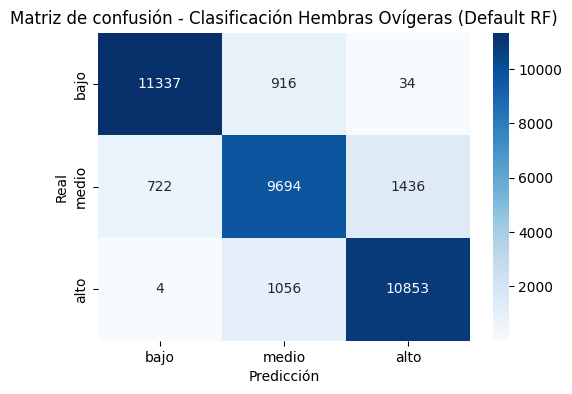

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
# (Si ya tienes df, omite esta línea)
df = pd.read_excel("Archivo_Unificado_Limpio.xlsx")

# Eliminar nulos relevantes
variables_relevantes = [
    'semana', 'Año', 'Temperatura', 'Salinidad',
    'Prom. Hembras Ovígeras', 'Prom. Adultos Móviles', 'Prom. Juveniles'
]
df = df.dropna(subset=variables_relevantes)

# Clasificar "Prom. Hembras Ovígeras" en terciles (bajo, medio, alto)
terciles = df['Prom. Hembras Ovígeras'].quantile([1/3, 2/3]).values

def categorizar_hembras(x):
    if x <= terciles[0]:
        return 'bajo'
    elif x <= terciles[1]:
        return 'medio'
    else:
        return 'alto'

# Crear columna categórica
df['Hem_Ov_Cat'] = df['Prom. Hembras Ovígeras'].apply(categorizar_hembras)

# Variables predictoras (sin la variable objetivo)
X = df[['semana', 'Año', 'Temperatura', 'Salinidad', 'Prom. Adultos Móviles', 'Prom. Juveniles']]
y = df['Hem_Ov_Cat']

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Modelo Random Forest con hiperparámetros por defecto
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicción y evaluación
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=['bajo', 'medio', 'alto'])
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['bajo', 'medio', 'alto'], yticklabels=['bajo', 'medio', 'alto'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión - Clasificación Hembras Ovígeras (Default RF)')
plt.show()

## Random Forest Regressor con GridSearchCV para predecir parásitos totales por región y condiciones ambientales

En esta sección, se implementa un modelo Random Forest Regressor para predecir la cantidad de parásitos totales usando todas las variables relevantes, incluyendo región, especie, temperatura y salinidad. Se utiliza GridSearchCV para optimizar los hiperparámetros y se reportan los resultados y la importancia de variables.

Fitting 2 folds for each of 16 candidates, totalling 32 fits
Mejores hiperparámetros:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mejores hiperparámetros:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
MSE: 0.56
R²: 0.996

Importancia de variables:
Prom. Adultos Móviles      0.608930
Prom. Juveniles            0.339447
Prom. Hembras Ovígeras     0.049385
semana                     0.000578
Temperatura                0.000341
Salinidad                  0.000253
ACS_ACS 10 B               0.000201
Año                        0.000201
Región_XI REGION           0.000153
ACS_ACS 18 A               0.000130
ACS_ACS 20                 0.000062
Especie_Trucha Arcoiris    0.000036
ACS_ACS 34                 0.000033
ACS_ACS 30 A               0.000024
ACS_ACS 18 C               0.000023
dtype: float64
MSE: 0.56
R²: 0.996

Importancia de variables:
Prom. Adultos Móviles     

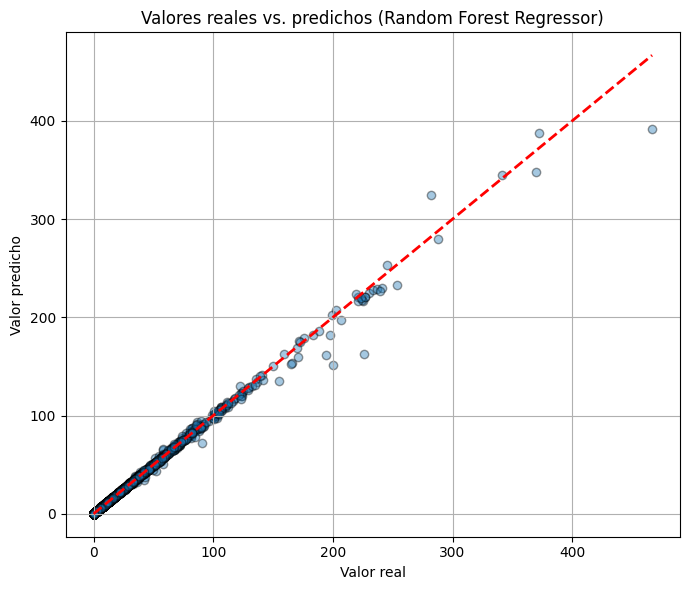

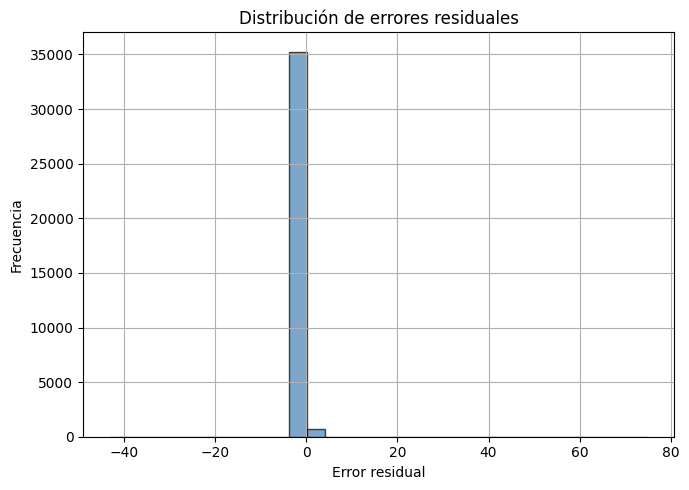

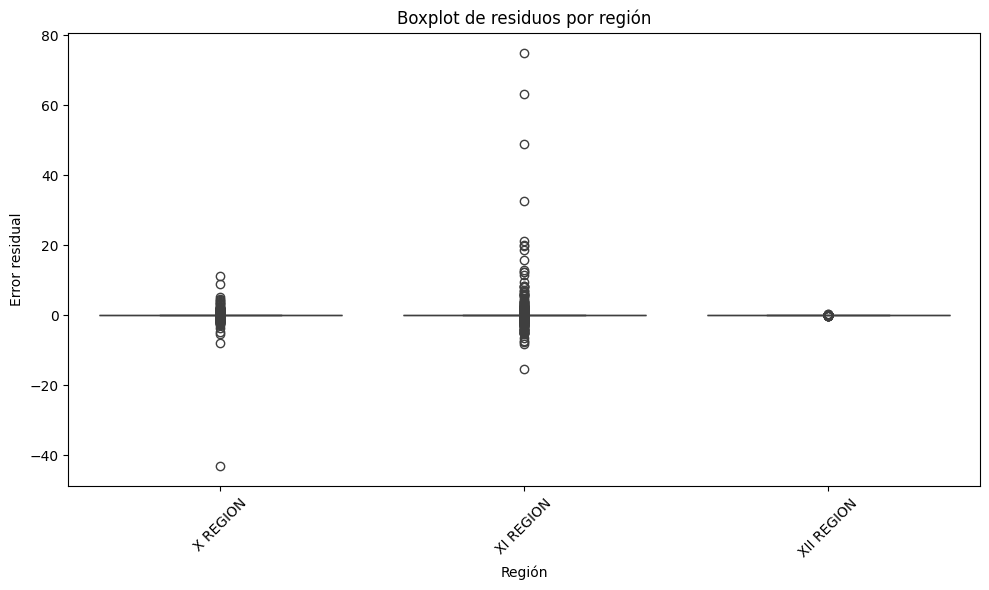

C:\Users\nicoa\AppData\Local\Temp\ipykernel_21464\4061309023.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias, y=importancias.index, palette='viridis')


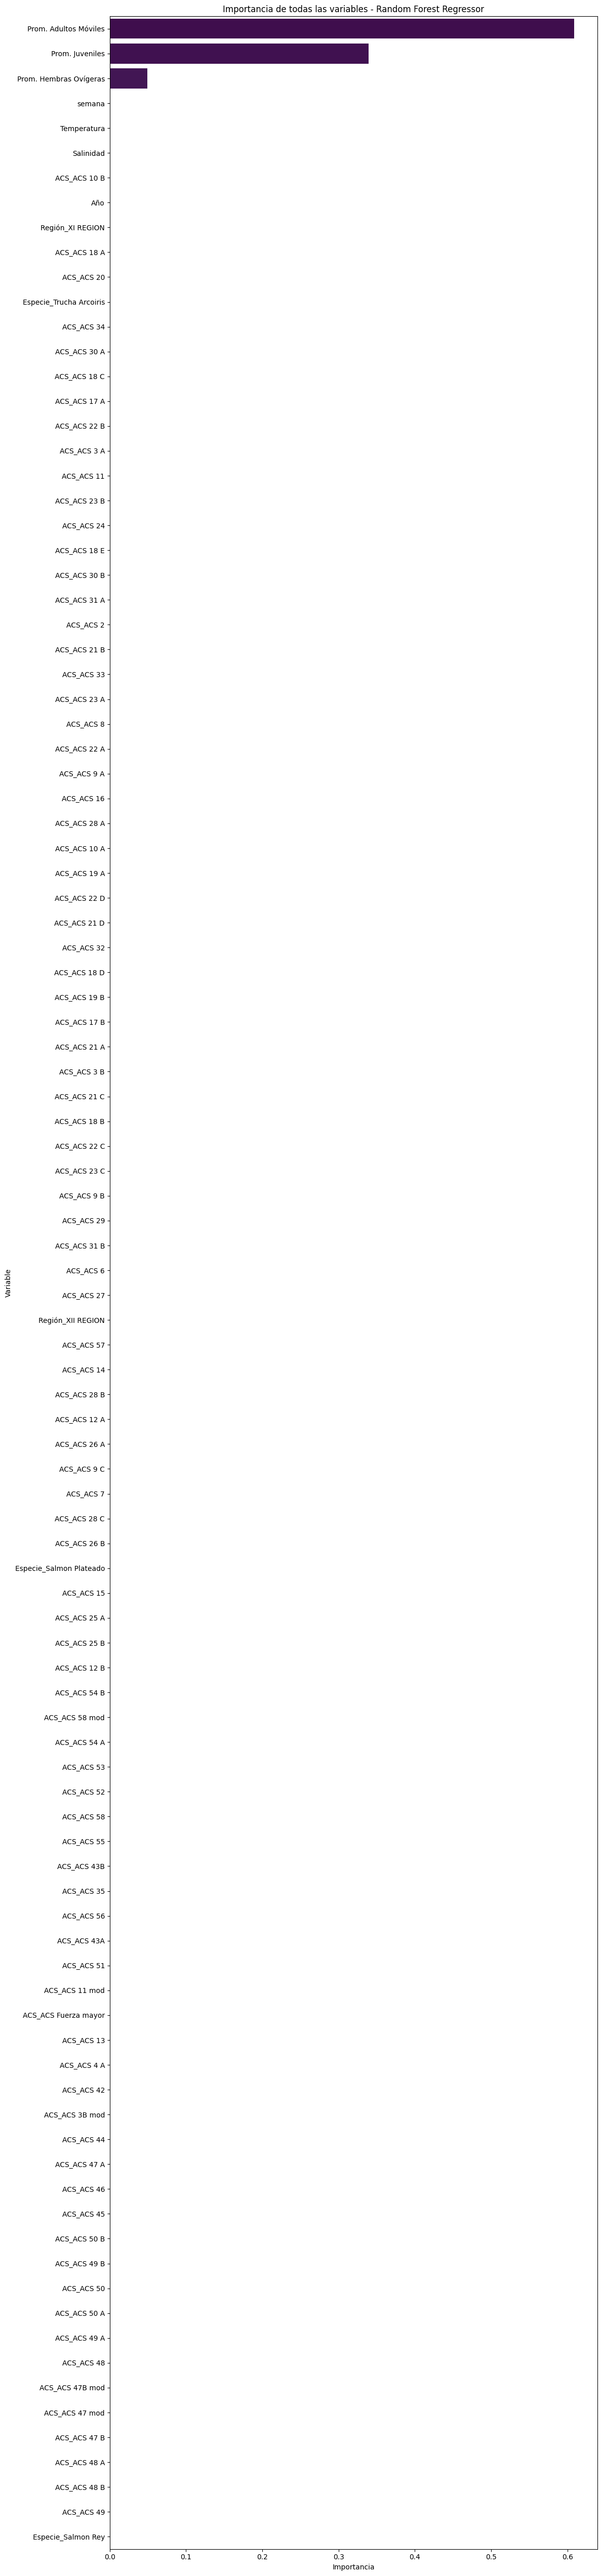

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
ruta = "Archivo_Unificado_Limpio.xlsx"
df = pd.read_excel(ruta)

# Eliminar filas con nulos en las variables relevantes
variables_relevantes = [
    'semana', 'Año', 'Temperatura', 'Salinidad',
    'Prom. Hembras Ovígeras', 'Prom. Adultos Móviles', 'Prom. Juveniles',
    'Región', 'Especie', 'Prom. Parásitos Totales'
]
df = df.dropna(subset=variables_relevantes)

# OPCIONAL: usar una muestra del dataset para acelerar (descomentar si es necesario)
# df = df.sample(n=5000, random_state=42)  # Usa solo 5000 filas

# Codificar variables categóricas
X = pd.get_dummies(df.drop(columns=['Prom. Parásitos Totales', 'Código Centro']), drop_first=True)
y = df['Prom. Parásitos Totales']

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Grilla reducida para GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=2, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:")
print(grid_search.best_params_)

# Evaluación del mejor modelo
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.3f}")

# Importancia de variables
importancias = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nImportancia de variables:")
print(importancias.head(15))

# --- Visualizaciones ---
# 1. Dispersión de valores reales vs. predichos
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred, alpha=0.4, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.title('Valores reales vs. predichos (Random Forest Regressor)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Histograma de errores residuales
residuos = y_test - y_pred
plt.figure(figsize=(7, 5))
plt.hist(residuos, bins=30, color='steelblue', edgecolor='k', alpha=0.7)
plt.xlabel('Error residual')
plt.ylabel('Frecuencia')
plt.title('Distribución de errores residuales')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Boxplot de residuos por región (si la variable existe en el test set)
if 'Región' in df.columns:
    test_idx = y_test.index
    regiones_test = df.loc[test_idx, 'Región']
    df_box = pd.DataFrame({'Región': regiones_test, 'residuo': residuos})
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Región', y='residuo', data=df_box)
    plt.title('Boxplot de residuos por región')
    plt.xlabel('Región')
    plt.ylabel('Error residual')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 4. Importancia de todas las variables
plt.figure(figsize=(12, max(6, int(len(importancias)/2))))
sns.barplot(x=importancias, y=importancias.index, palette='viridis')
plt.title('Importancia de todas las variables - Random Forest Regressor')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

In [ ]:
# Reducción de la grilla de hiperparámetros para acelerar GridSearchCV
# Se reduce la cantidad de combinaciones y se puede usar una muestra del dataset si es necesario

# OPCIONAL: usar una muestra del dataset para acelerar (descomentar si es necesario)
# df = df.sample(n=5000, random_state=42)  # Usa solo 5000 filas

# Nueva grilla reducida
param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'bootstrap': [True]
}

# Configurar y ejecutar GridSearchCV con la grilla reducida
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=2, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros (grilla reducida):")
print(grid_search.best_params_)

# Evaluación del mejor modelo
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(y_test.index)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.3f}")

# Importancia de variables
importancias = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nImportancia de variables:")
print(importancias.head(15))

# Visualización de importancia de variables
plt.figure(figsize=(10, 6))
sns.barplot(x=importancias.head(15), y=importancias.head(15).index, palette='viridis')
plt.title('Top 15 Importancias de Variables - Random Forest Regressor (grilla reducida)')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

Fitting 2 folds for each of 1 candidates, totalling 2 fits
